In [3]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
model = CmdStanModel(stan_file='stan1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [5]:
result = model.sample(data={'N':1, 'y':[1]},
                        seed = 14071999,
                        chains = 4)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [6]:
print(result.diagnose())

Processing csv files: C:\Users\JASKIE~1\AppData\Local\Temp\tmpo8w7bon1\stan1-20220510083035_1.csv, C:\Users\JASKIE~1\AppData\Local\Temp\tmpo8w7bon1\stan1-20220510083035_2.csv, C:\Users\JASKIE~1\AppData\Local\Temp\tmpo8w7bon1\stan1-20220510083035_3.csv, C:\Users\JASKIE~1\AppData\Local\Temp\tmpo8w7bon1\stan1-20220510083035_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
176 of 4000 (4.40%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



In [7]:
avriz_result = az.from_cmdstanpy(
    posterior=result
)

post = avriz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
avriz_result 

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

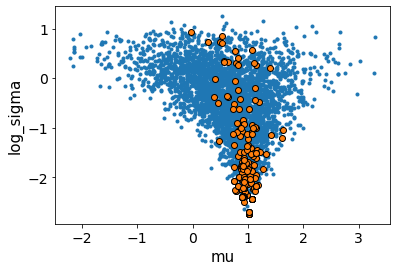

In [8]:
az.plot_pair(avriz_result, var_names=['mu', 'log_sigma'], divergences=True)

Excercise 2

In [10]:
data = pd.read_csv('coin.csv')
print(data)
y = data['Toss_Result']
N = len(data.index)

     Experiment_Id  Toss_Result
0              892            0
1              893            0
2              894            1
3              895            0
4              896            0
..             ...          ...
413           1305            0
414           1306            1
415           1307            1
416           1308            0
417           1309            1

[418 rows x 2 columns]


In [14]:
model = CmdStanModel(stan_file=r'C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab3\stan2.stan')
result = model.sample(data={"N" : N, "y" : y}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [16]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-290.00,0.01800,0.720,-290.00,-290.00,-290.0,1600.0,13000.0,1.0
theta,0.46,0.00066,0.025,0.42,0.46,0.5,1400.0,11000.0,1.0


In [17]:
arviz_result = az.from_cmdstanpy(
    posterior=result
)
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

array([[<AxesSubplot:title={'center':'theta'}>]], dtype=object)

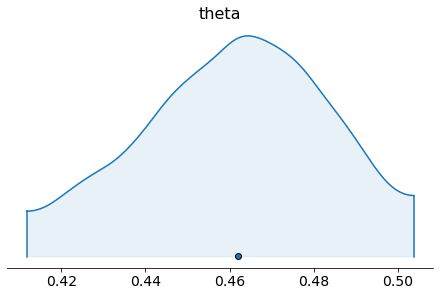

In [18]:
az.plot_density(arviz_result,shade=0.1)

In [22]:
data_n = pd.read_csv(r'C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab3\normal.csv')
print(data_n)
y = data_n['value']
N = len(data_n.index)

    Unnamed: 0  value
0            0 -0.039
1            1  1.085
2            2 -2.794
3            3  1.652
4            4  1.380
..         ...    ...
95          95  0.191
96          96  0.461
97          97  0.103
98          98  0.706
99          99  1.382

[100 rows x 2 columns]


In [23]:
model = CmdStanModel(stan_file=r'C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab3\stan3.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab3\stan3.stan to exe file C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab3\stan3.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab3\stan3.exe


In [24]:
result = model.sample(data={'N':N, 'y':y}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [25]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-53.0000,0.0250,1.100,-55.00,-53.0000,-52.00,1700.0,2500.0,1.0
mu,-0.0350,0.0020,0.110,-0.21,-0.0340,0.14,2800.0,4000.0,1.0
sigma,1.0000,0.0013,0.073,0.91,1.0000,1.20,3100.0,4400.0,1.0
y_rep[1],-0.0290,0.0160,1.000,-1.70,-0.0360,1.70,4259.0,6067.0,1.0
y_rep[2],-0.0530,0.0160,1.000,-1.70,-0.0710,1.70,4170.0,5940.0,1.0
...,...,...,...,...,...,...,...,...,...
y_rep[96],-0.0330,0.0170,1.000,-1.70,-0.0340,1.60,3868.0,5510.0,1.0
y_rep[97],-0.0520,0.0170,1.000,-1.80,-0.0610,1.70,3928.0,5596.0,1.0
y_rep[98],-0.0080,0.0170,1.000,-1.70,-0.0180,1.70,3928.0,5596.0,1.0


In [26]:
arviz_result = az.from_cmdstanpy(
    posterior=result,
    posterior_predictive=["y_rep"], 
    observed_data={"y": y},
)
arviz_result

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<AxesSubplot:xlabel='y / y_rep'>

C:\Users\Jaskier-PC\anaconda3\envs\Data_Anal\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


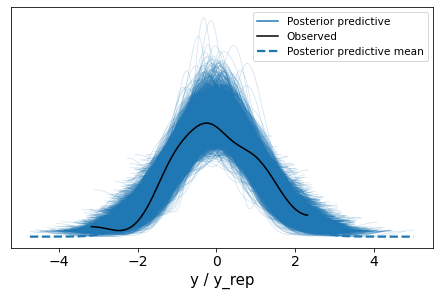

In [27]:
az.plot_ppc(arviz_result,data_pairs={"y": "y_rep"})

In [28]:
model = CmdStanModel(stan_file=r'C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab3\stan4.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab3\stan4.stan to exe file C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab3\stan4.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab3\stan4.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Jaskier-PC/Desktop/semestr8/Data_analysis/Lab3/stan4.hpp C:/Users/Jaskier-PC/Desktop/semestr8/Data_analysis/Lab3/stan4.stan
Warning in 'C:/Users/Jaskier-PC/Desktop/semestr8/Data_analysis/Lab3/stan4.stan', line 7, column 25: Use
    of the `abs` function with real-valued arguments is deprecated; use
    function `fabs` instead.

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unused-but-set-variable -Wno-unused-variable -Wno-sign-compare -Wno-unused-local-typedefs -Wno-int-in-bool-context -Wno-attributes -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2

In [29]:
result = model.sample(data={'N':100}, 
                            chains = 1,
                            fixed_param=True,
                            seed = 523833
                            )

INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [30]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.0000,NaN,0.0,0.000,0.0000,0.0,NaN,NaN,NaN
mu,-0.0220,0.031,1.0,-1.700,-0.0150,1.6,1100.0,9200.0,1.0
sigma,0.7900,0.019,0.6,0.041,0.6700,1.9,1000.0,8700.0,1.0
y_prior[1],-0.0540,0.042,1.4,-2.300,-0.0740,2.3,1126.0,9796.0,1.0
y_prior[2],0.0360,0.045,1.4,-2.100,-0.0077,2.4,1003.0,8723.0,1.0
...,...,...,...,...,...,...,...,...,...
y_prior[96],-0.0490,0.042,1.3,-2.200,-0.0060,2.0,1045.0,9085.0,1.0
y_prior[97],0.0027,0.050,1.4,-2.100,0.0300,2.2,770.0,6695.0,1.0
y_prior[98],-0.0190,0.041,1.4,-2.100,-0.0500,2.3,1178.0,10243.0,1.0


In [31]:
arviz_result = az.from_cmdstanpy(
    prior=result,
    prior_predictive=["y_prior"],
    observed_data={"y": y}
)
arviz_result

Inference data with groups:
	> prior
	> prior_predictive
	> observed_data

<AxesSubplot:xlabel='y / y_prior'>

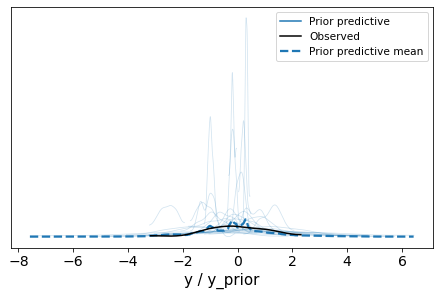

In [32]:
az.plot_ppc(arviz_result, group="prior", data_pairs={"y": "y_prior"}, num_pp_samples=30)

Text(0.5, 1.0, 'y_prior histogram')

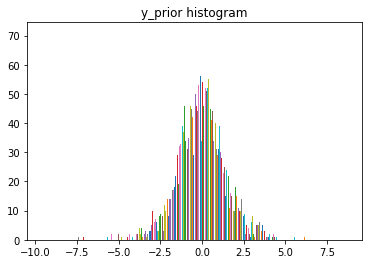

In [33]:
y_prior = result.stan_variable('y_prior')
plt.hist(y_prior, bins = 120)
plt.title('y_prior histogram')